In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import norm

In [2]:
df = pd.read_csv("temu-2025-10-03 (1).csv")

df.head()



,a-raak6 href,text-1f3st,price-2Xz_3,marketPrice-_hB9u,saleTextSpan-7Ilte,saleTextSpan-7Ilte (2),numTips-6aaQF,lazy-image src,lazy-image src (2),text-1UhOK,tagText-VVyl-,lazy-image src (3),text-2O_rg,lazy-image src (4),tagText-VVyl- (2),video-2LlV5 src,tagText-VVyl- (3)
0,https://www.temu.com/kg-en/5pcs--cleaning-clot...,5pcs of magic cleaning cloth to wipe the glass...,69.78 сом,202.26,100K+,sold,(84 646),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.temu.com/kg-en/1pc--black-large-cu...,1pc Purple/Pink/Black Large Curved Detangling ...,118.35 сом,159.87,24K+,sold,(3 174),https://img.kwcdn.com/product/fancy/d8ce7cef-8...,https://aimg.kwcdn.com/upload_aimg/temu/352187...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.temu.com/kg-en/8-in-1-usb-hub-with...,"8-in-1 USB Hub with Audio Jack, Multi-Port Ada...",374.50 сом,484.90,100K+,sold,(13 011),https://img.kwcdn.com/product/fancy/3de155cc-e...,https://aimg.kwcdn.com/upload_aimg/temu/352187...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.temu.com/kg-en/2-in-1-polyester-kn...,2-in-1 Polyester Knit Balaclava Beanie Hat wit...,200.50 сом,227.88,18K+,sold,(1 286),https://img.kwcdn.com/product/fancy/37f15228-b...,https://img.kwcdn.com/product/fancy/d6ae31c7-c...,Quick look,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.temu.com/kg-en/500m-546yd-heavy-du...,500m/546YD Heavy-Duty Carbon-Coated Nylon Fish...,162.52 сом,327.68,12K+,sold,(889),https://img.kwcdn.com/product/fancy/0374ccf6-b...,https://aimg.kwcdn.com/upload_aimg/temu/352187...,NaN,Almost sold out,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.fillna('N/T')
df

,a-raak6 href,text-1f3st,price-2Xz_3,marketPrice-_hB9u,saleTextSpan-7Ilte,saleTextSpan-7Ilte (2),numTips-6aaQF,lazy-image src,lazy-image src (2),text-1UhOK,tagText-VVyl-,lazy-image src (3),text-2O_rg,lazy-image src (4),tagText-VVyl- (2),video-2LlV5 src,tagText-VVyl- (3)
0,https://www.temu.com/kg-en/5pcs--cleaning-clot...,5pcs of magic cleaning cloth to wipe the glass...,69.78 сом,202.26,100K+,sold,(84 646),N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T
1,https://www.temu.com/kg-en/1pc--black-large-cu...,1pc Purple/Pink/Black Large Curved Detangling ...,118.35 сом,159.87,24K+,sold,(3 174),https://img.kwcdn.com/product/fancy/d8ce7cef-8...,https://aimg.kwcdn.com/upload_aimg/temu/352187...,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T
2,https://www.temu.com/kg-en/8-in-1-usb-hub-with...,"8-in-1 USB Hub with Audio Jack, Multi-Port Ada...",374.50 сом,484.90,100K+,sold,(13 011),https://img.kwcdn.com/product/fancy/3de155cc-e...,https://aimg.kwcdn.com/upload_aimg/temu/352187...,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T
3,https://www.temu.com/kg-en/2-in-1-polyester-kn...,2-in-1 Polyester Knit Balaclava Beanie Hat wit...,200.50 сом,227.88,18K+,sold,(1 286),https://img.kwcdn.com/product/fancy/37f15228-b...,https://img.kwcdn.com/product/fancy/d6ae31c7-c...,Quick look,N/T,N/T,N/T,N/T,N/T,N/T,N/T
4,https://www.temu.com/kg-en/500m-546yd-heavy-du...,500m/546YD Heavy-Duty Carbon-Coated Nylon Fish...,162.52 сом,327.68,12K+,sold,(889),https://img.kwcdn.com/product/fancy/0374ccf6-b...,https://aimg.kwcdn.com/upload_aimg/temu/352187...,N/T,Almost sold out,N/T,N/T,N/T,N/T,N/T,N/T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,https://www.temu.com/kg-en/1pc-30-48cm-phone-a...,"1pc 30.48cm Phone Amplifier, 3D Screen Extende...",271.57 сом,418.66,1.4K+,sold,(73),https://img.kwcdn.com/product/open/508b508d45d...,https://aimg.kwcdn.com/upload_aimg/temu/352187...,N/T,Almost sold out,N/T,N/T,N/T,N/T,N/T,N/T
9998,https://www.temu.com/kg-en/car-headlight-resto...,"Car Headlight Restoration Kit: Polish, Scratch...",132.66 сом,205.66,19K+,sold,(483),https://img.kwcdn.com/product/fancy/1dc01daf-9...,https://aimg.kwcdn.com/upload_aimg/temu/352187...,N/T,N/T,N/T,N/T,N/T,N/T,N/T,N/T
9999,https://www.temu.com/kg-en/50pcs-red-and-golde...,"50pcs, red and Golden colorful latex balloons,...",138.91 сом,171.35,20K+,sold,(1 578),https://img.kwcdn.com/product/fancy/164c3254-a...,https://img.kwcdn.com/product/fancy/03c1a94c-4...,Quick look,N/T,N/T,N/T,N/T,N/T,N/T,N/T
10000,https://www.temu.com/kg-en/4-8pcs-new-fluoresc...,4/8pcs New Fluorescent Skull Tire Valve Cover ...,74.19 сом,105.11,35K+,sold,(4 047),https://img.kwcdn.com/product/fancy/b5bc75cb-a...,https://img.kwcdn.com/product/fancy/0c43f3f6-2...,Quick look,N/T,N/T,N/T,N/T,N/T,N/T,N/T


In [6]:
df = df.drop(
    columns=[
        "a-raak6 href",
        "tagText-VVyl- (3)",
        "video-2LlV5 src",
        "tagText-VVyl- (2)",
        "lazy-image src (4)",
        "text-2O_rg",
        "lazy-image src (3)",
        "tagText-VVyl-",
        "lazy-image src",
        "lazy-image src (2)"
        
        
    ],
    errors="ignore"
)

df.to_csv("output.csv", index=False)

df 

,text-1f3st,price-2Xz_3,marketPrice-_hB9u,saleTextSpan-7Ilte,saleTextSpan-7Ilte (2),numTips-6aaQF,text-1UhOK
0,5pcs of magic cleaning cloth to wipe the glass...,69.78 сом,202.26,100K+,sold,(84 646),N/T
1,1pc Purple/Pink/Black Large Curved Detangling ...,118.35 сом,159.87,24K+,sold,(3 174),N/T
2,"8-in-1 USB Hub with Audio Jack, Multi-Port Ada...",374.50 сом,484.90,100K+,sold,(13 011),N/T
3,2-in-1 Polyester Knit Balaclava Beanie Hat wit...,200.50 сом,227.88,18K+,sold,(1 286),Quick look
4,500m/546YD Heavy-Duty Carbon-Coated Nylon Fish...,162.52 сом,327.68,12K+,sold,(889),N/T
...,...,...,...,...,...,...,...
9997,"1pc 30.48cm Phone Amplifier, 3D Screen Extende...",271.57 сом,418.66,1.4K+,sold,(73),N/T
9998,"Car Headlight Restoration Kit: Polish, Scratch...",132.66 сом,205.66,19K+,sold,(483),N/T
9999,"50pcs, red and Golden colorful latex balloons,...",138.91 сом,171.35,20K+,sold,(1 578),Quick look
10000,4/8pcs New Fluorescent Skull Tire Valve Cover ...,74.19 сом,105.11,35K+,sold,(4 047),Quick look


In [7]:
df = df.drop_duplicates()
df


,text-1f3st,price-2Xz_3,marketPrice-_hB9u,saleTextSpan-7Ilte,saleTextSpan-7Ilte (2),numTips-6aaQF,text-1UhOK
0,5pcs of magic cleaning cloth to wipe the glass...,69.78 сом,202.26,100K+,sold,(84 646),N/T
1,1pc Purple/Pink/Black Large Curved Detangling ...,118.35 сом,159.87,24K+,sold,(3 174),N/T
2,"8-in-1 USB Hub with Audio Jack, Multi-Port Ada...",374.50 сом,484.90,100K+,sold,(13 011),N/T
3,2-in-1 Polyester Knit Balaclava Beanie Hat wit...,200.50 сом,227.88,18K+,sold,(1 286),Quick look
4,500m/546YD Heavy-Duty Carbon-Coated Nylon Fish...,162.52 сом,327.68,12K+,sold,(889),N/T
...,...,...,...,...,...,...,...
4394,Men'S Thermal Half-Zip Pullover Sweater - Soft...,1 116.40 сом,1 565.11,373,sold,(12),Quick look
4395,Women'S Elegant White Fleece-Lined Ankle Boots...,646.90 сом,2 821.08,1.2K+,sold,(48),N/T
4396,Women'S Casual V-Neck Long Sleeve Jumpsuit - S...,1 279.66 сом,1 908.69,2.2K+,sold,(85),N/T
4397,Women'S Winter Warm Round-Toe Ankle Boots with...,673.03 сом,1 611.04,2.9K+,sold,(162),N/T


In [9]:
df = df.rename(columns={
    "text-1f3st": "Product_name",
    "price-2Xz_3": "Price",
    "marketPrice-_hB9u": "Market_price",
    "saleTextSpan-7Ilte": "Sales_count",
    "saleTextSpan-7Ilte (2)": "Status",
    "numTips-6aaQF": "Reviews",
    "text-1UhOK": "Note"
})

df.columns = [col.split('-')[0] for col in df.columns]


df

,Product_name,Price,Market_price,Sales_count,Status,Reviews,Note
0,5pcs of magic cleaning cloth to wipe the glass...,69.78 сом,202.26,100K+,sold,(84 646),N/T
1,1pc Purple/Pink/Black Large Curved Detangling ...,118.35 сом,159.87,24K+,sold,(3 174),N/T
2,"8-in-1 USB Hub with Audio Jack, Multi-Port Ada...",374.50 сом,484.90,100K+,sold,(13 011),N/T
3,2-in-1 Polyester Knit Balaclava Beanie Hat wit...,200.50 сом,227.88,18K+,sold,(1 286),Quick look
4,500m/546YD Heavy-Duty Carbon-Coated Nylon Fish...,162.52 сом,327.68,12K+,sold,(889),N/T
...,...,...,...,...,...,...,...
4394,Men'S Thermal Half-Zip Pullover Sweater - Soft...,1 116.40 сом,1 565.11,373,sold,(12),Quick look
4395,Women'S Elegant White Fleece-Lined Ankle Boots...,646.90 сом,2 821.08,1.2K+,sold,(48),N/T
4396,Women'S Casual V-Neck Long Sleeve Jumpsuit - S...,1 279.66 сом,1 908.69,2.2K+,sold,(85),N/T
4397,Women'S Winter Warm Round-Toe Ankle Boots with...,673.03 сом,1 611.04,2.9K+,sold,(162),N/T


In [10]:

df["Price"] = df["Price"].str.replace(" сом", "", regex=False).str.strip()


df["Reviews"] = df["Reviews"].str.replace(r"[\(\)]", "", regex=True).str.strip()


df




,Product_name,Price,Market_price,Sales_count,Status,Reviews,Note
0,5pcs of magic cleaning cloth to wipe the glass...,69.78,202.26,100K+,sold,84 646,N/T
1,1pc Purple/Pink/Black Large Curved Detangling ...,118.35,159.87,24K+,sold,3 174,N/T
2,"8-in-1 USB Hub with Audio Jack, Multi-Port Ada...",374.50,484.90,100K+,sold,13 011,N/T
3,2-in-1 Polyester Knit Balaclava Beanie Hat wit...,200.50,227.88,18K+,sold,1 286,Quick look
4,500m/546YD Heavy-Duty Carbon-Coated Nylon Fish...,162.52,327.68,12K+,sold,889,N/T
...,...,...,...,...,...,...,...
4394,Men'S Thermal Half-Zip Pullover Sweater - Soft...,1 116.40,1 565.11,373,sold,12,Quick look
4395,Women'S Elegant White Fleece-Lined Ankle Boots...,646.90,2 821.08,1.2K+,sold,48,N/T
4396,Women'S Casual V-Neck Long Sleeve Jumpsuit - S...,1 279.66,1 908.69,2.2K+,sold,85,N/T
4397,Women'S Winter Warm Round-Toe Ankle Boots with...,673.03,1 611.04,2.9K+,sold,162,N/T


In [11]:

texts = df["Product_name"].astype(str)
vec = TfidfVectorizer(lowercase=True, ngram_range=(1, 2), min_df=5, max_df=0.5)
X = vec.fit_transform(texts)


k = 6
km = KMeans(n_clusters=k, n_init=10, random_state=42)
clusters = km.fit_predict(X)   

terms = np.array(vec.get_feature_names_out())
for i, idx in enumerate(km.cluster_centers_.argsort()[:, -10:][:, ::-1]):
    print(f"\nCluster {i}: " + ", ".join(terms[idx]))


cluster2cat = {
    0: "Electronics",
    1: "Clothing",
    2: "Home & Kitchen",
    3: "Beauty & Health",
    4: "Sports & Outdoors",
    5: "Toys & Hobbies"
}


df["Category_auto"] = pd.Series(clusters).map(cluster2cat).fillna("Other")


df 


Cluster 0: pro, 14, max, 15, 13, pro max, 16, iphone, 11, 12

Cluster 1: and, with, hair, car, design, suitable, home, suitable for, durable, kitchen

Cluster 2: casual, winter, men, women, jacket, sleeve, fit, long sleeve, with, pants

Cluster 3: wall, decor, 2d, art, 2d flat, flat, room, wall art, canvas, decoration

Cluster 4: boots, women, sole, ankle, heel, footwear, winter, toe, slip, ankle boots

Cluster 5: socks, pairs, socks for, calf, mid calf, breathable, mid, calf socks, winter, pairs of


,Product_name,Price,Market_price,Sales_count,Status,Reviews,Note,Category_auto
0,5pcs of magic cleaning cloth to wipe the glass...,69.78,202.26,100K+,sold,84 646,N/T,Clothing
1,1pc Purple/Pink/Black Large Curved Detangling ...,118.35,159.87,24K+,sold,3 174,N/T,Clothing
2,"8-in-1 USB Hub with Audio Jack, Multi-Port Ada...",374.50,484.90,100K+,sold,13 011,N/T,Clothing
3,2-in-1 Polyester Knit Balaclava Beanie Hat wit...,200.50,227.88,18K+,sold,1 286,Quick look,Home & Kitchen
4,500m/546YD Heavy-Duty Carbon-Coated Nylon Fish...,162.52,327.68,12K+,sold,889,N/T,Clothing
...,...,...,...,...,...,...,...,...
4394,Men'S Thermal Half-Zip Pullover Sweater - Soft...,1 116.40,1 565.11,373,sold,12,Quick look,Home & Kitchen
4395,Women'S Elegant White Fleece-Lined Ankle Boots...,646.90,2 821.08,1.2K+,sold,48,N/T,Sports & Outdoors
4396,Women'S Casual V-Neck Long Sleeve Jumpsuit - S...,1 279.66,1 908.69,2.2K+,sold,85,N/T,Home & Kitchen
4397,Women'S Winter Warm Round-Toe Ankle Boots with...,673.03,1 611.04,2.9K+,sold,162,N/T,Sports & Outdoors


In [45]:
def clean_money(series: pd.Series) -> pd.Series:
    s = series.astype(str).str.strip()

    s = s.str.replace(r"[^\d,.\-]", "", regex=True)

    mask_decimal_comma = s.str.contains(",") & ~s.str.contains(r"\.")
    s = s.where(~mask_decimal_comma, s.str.replace(",", ".", regex=False))

    s = s.str.replace(",", "", regex=False)

    return pd.to_numeric(s, errors="coerce")


if "price" in df.columns:
    df["price_num"] = clean_money(df["price"])
if "market_price" in df.columns:
    df["market_price_num"] = clean_money(df["market_price"])

price_col = None
for c in ["price_num", "market_price_num"]:
    if c in df.columns and df[c].notna().sum() > 0:
        price_col = c
        break

if price_col is None:
    raise ValueError("Нет числовых цен после очистки. Проверь столбцы 'Price' / 'Market_price'.")


if "category_auto" not in df.columns:
    raise KeyError("Колонка 'Category_auto' отсутствует. Проверь имя столбца категорий.")
category_prices = (
    df.loc[df["category_auto"].notna()]
      .groupby("category_auto")[price_col]
      .mean()
      .sort_values(ascending=False)
      
      
    
)

price_col = "price_num" if "price_num" in df.columns else ("market_price_num" if "market_price_num" in df.columns else None)
cat_col = "category_auto"
status_col = "status"

if price_col is None:
    raise ValueError("Не найден столбец с числовой ценой. Проверь данные.")


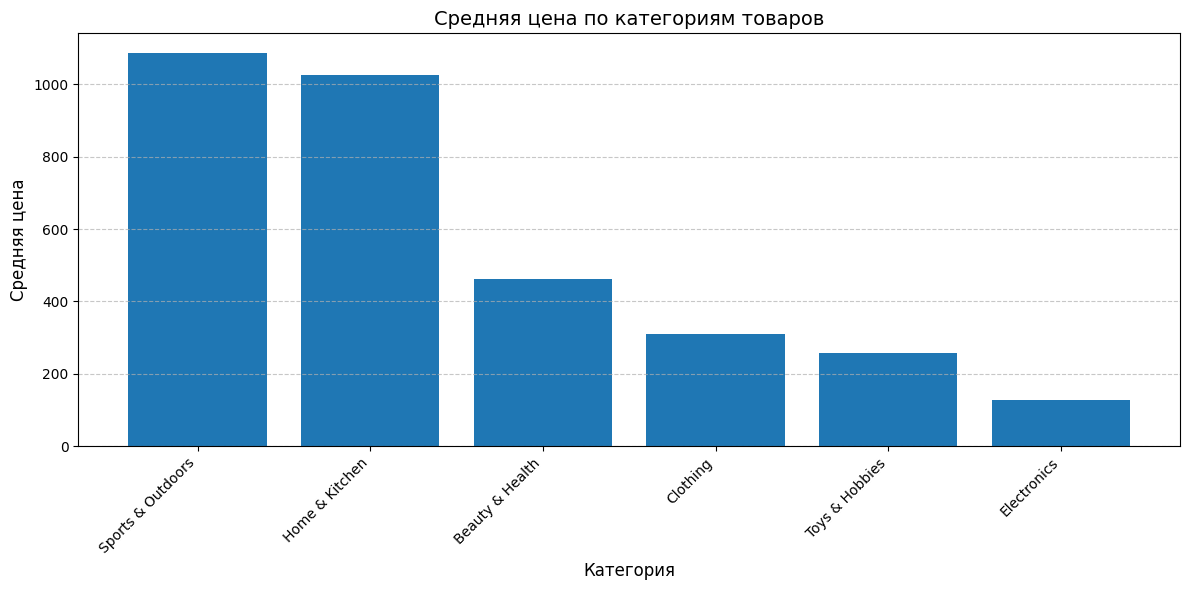

Использована колонка: price_num
category_auto
Sports & Outdoors    1085.935617
Home & Kitchen       1023.925658
Beauty & Health       462.705171
Clothing              310.431864
Toys & Hobbies        257.631367
Electronics           127.620111
Name: price_num, dtype: float64


In [43]:

df.columns = df.columns.str.strip().str.lower()



plt.figure(figsize=(12, 6))
plt.bar(category_prices.index, category_prices.values)
plt.title("Средняя цена по категориям товаров", fontsize=14)
plt.xlabel("Категория", fontsize=12)
plt.ylabel("Средняя цена", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


print(f"Использована колонка: {price_col}")
print(category_prices.head(10))

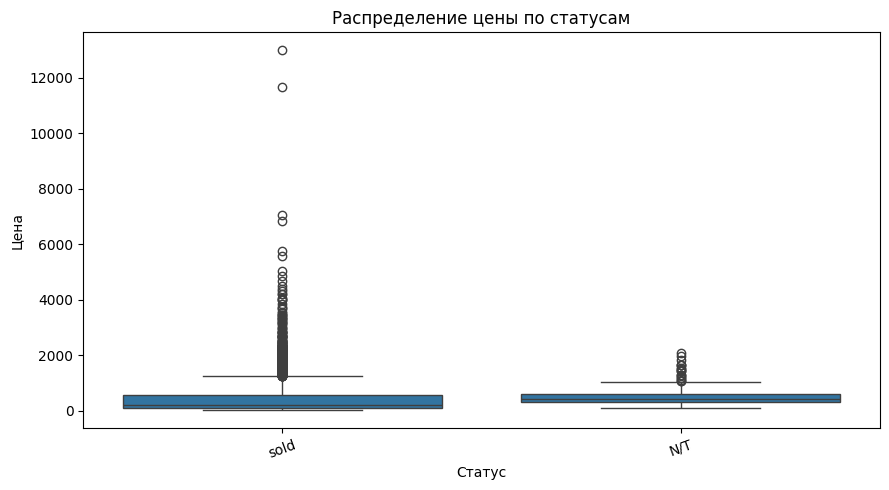

In [47]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df.dropna(subset=[status_col, price_col]), x=status_col, y=price_col)
plt.title("Распределение цены по статусам"); plt.xlabel("Статус"); plt.ylabel("Цена")
plt.xticks(rotation=20); plt.tight_layout(); plt.show()

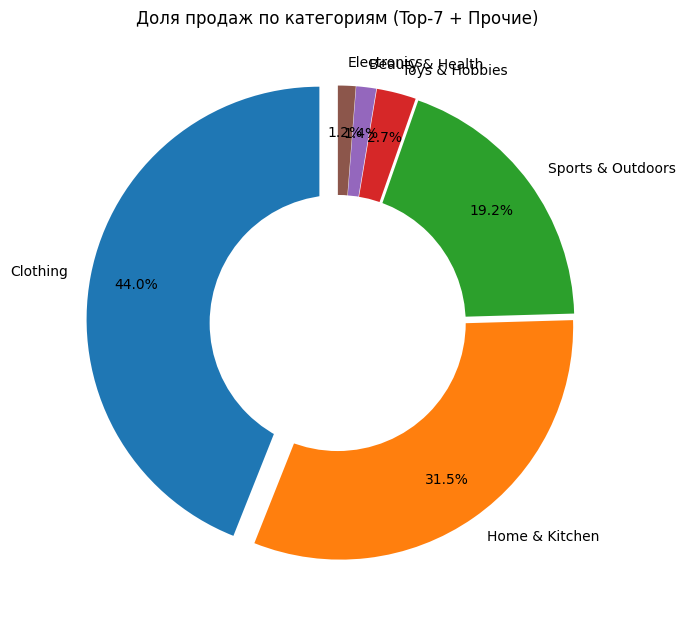

In [ ]:
df["sales_count"] = pd.to_numeric(df["sales_count"], errors="coerce")

s = (
    df.dropna(subset=[cat_col])              
      .groupby(cat_col)["sales_count"]
      .sum(min_count=1)                       
      .fillna(0)
)


s = s[s > 0]

if s.empty:
    raise ValueError("Нет положительных значений продаж для построения диаграммы.")


s_top = s.nlargest(7)
other_sum = s.drop(s_top.index, errors="ignore").sum()
vals = pd.concat([s_top, pd.Series({"Прочие": other_sum})]) if other_sum > 0 else s_top


labels = vals.index.astype(str).tolist()
sizes  = vals.values.astype(float)


fig, ax = plt.subplots(figsize=(7,7))
explode = [0.08 if i == 0 else 0.02 for i in range(len(sizes))]

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.8,
    explode=explode
)


centre = plt.Circle((0, 0), 0.55, fc="white")
ax.add_artist(centre)

ax.set_title("Доля продаж по категориям (Top-7 + Прочие)")
plt.tight_layout()
plt.show()

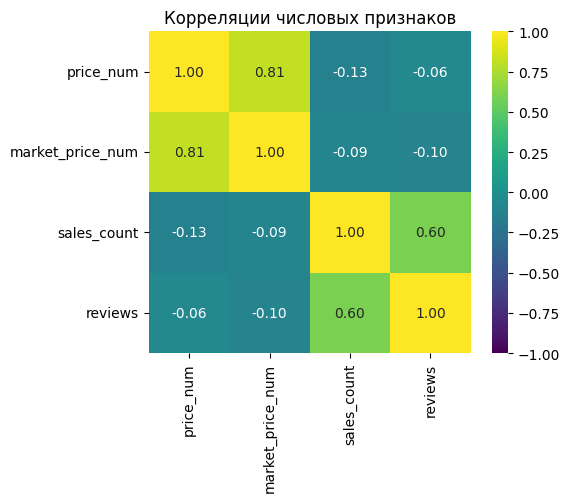

In [59]:
num_cols = [c for c in ["price_num","market_price_num","sales_count","reviews"] if c in df.columns]


num = df[num_cols].apply(pd.to_numeric, errors="coerce")

valid = num.columns[(num.count() >= 3) & (num.nunique(dropna=True) > 1)]
num = num[valid]

if num.shape[1] < 2:
    raise ValueError(f"Недостаточно чистых числовых колонок для корреляции. Нашёл: {list(num.columns)}")


corr = num.corr(method="pearson", min_periods=3)


plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, square=True, cmap="viridis")
plt.title("Корреляции числовых признаков")
plt.tight_layout()
plt.show()

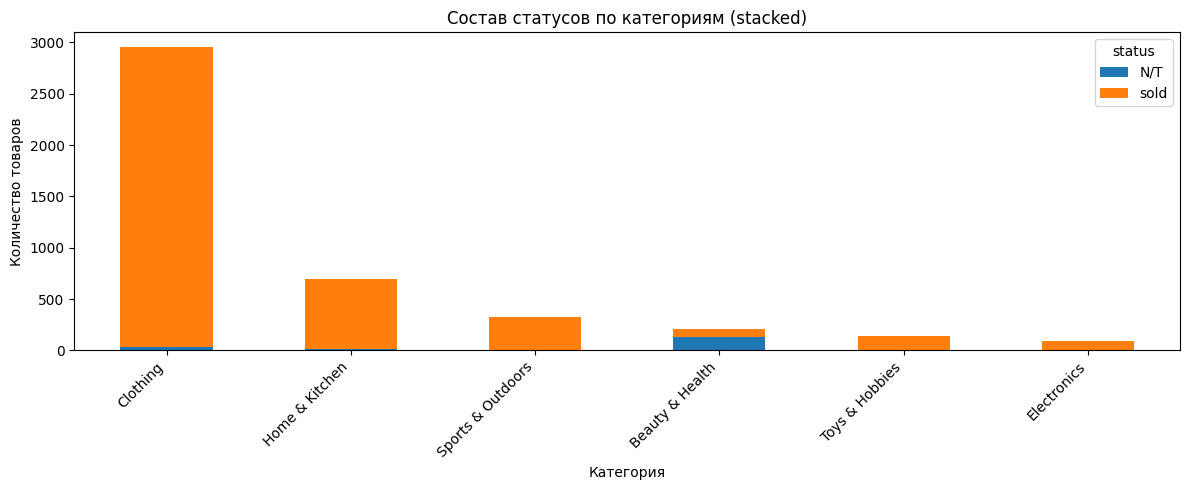

In [60]:
top_cats = df[cat_col].value_counts().head(8).index
ct = (df[df[cat_col].isin(top_cats)]
      .pivot_table(index=cat_col, columns=status_col, values="product_name", aggfunc="count", fill_value=0))
ct = ct.loc[top_cats]  # порядок
ct.plot(kind="bar", stacked=True, figsize=(12,5))
plt.title("Состав статусов по категориям (stacked)")
plt.xlabel("Категория"); plt.ylabel("Количество товаров")
plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15720\3419196593.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  line = d.groupby("price_bin")["sales_count"].mean()


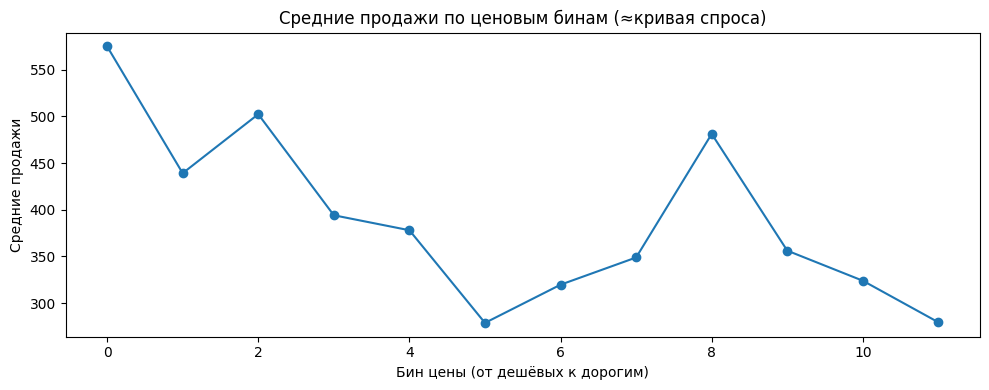

In [61]:
d = df.dropna(subset=[price_col,"sales_count"])[[price_col,"sales_count"]].copy()
d["price_bin"] = pd.qcut(d[price_col], q=12, duplicates="drop")
line = d.groupby("price_bin")["sales_count"].mean()
plt.figure(figsize=(10,4))
plt.plot(range(len(line)), line.values, marker="o")
plt.title("Средние продажи по ценовым бинам (≈кривая спроса)")
plt.xlabel("Бин цены (от дешёвых к дорогим)"); plt.ylabel("Средние продажи")
plt.tight_layout(); plt.show()

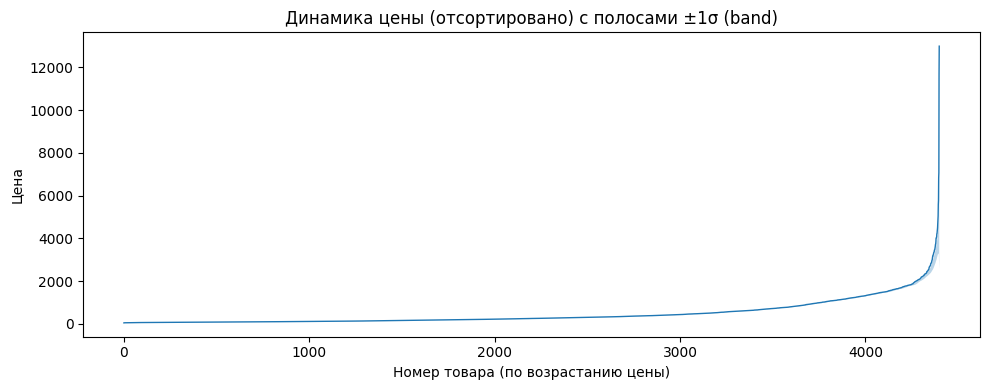

In [62]:
d = df.dropna(subset=[price_col]).copy()
d = d.sort_values(price_col).reset_index(drop=True)
roll = d[price_col].rolling(30, min_periods=5)
mean = roll.mean(); std = roll.std()

plt.figure(figsize=(10,4))
plt.plot(d.index, d[price_col], linewidth=1)
plt.fill_between(d.index, (mean-std), (mean+std), alpha=0.3)
plt.title("Динамика цены (отсортировано) с полосами ±1σ (band)")
plt.xlabel("Номер товара (по возрастанию цены)"); plt.ylabel("Цена")
plt.tight_layout(); plt.show()

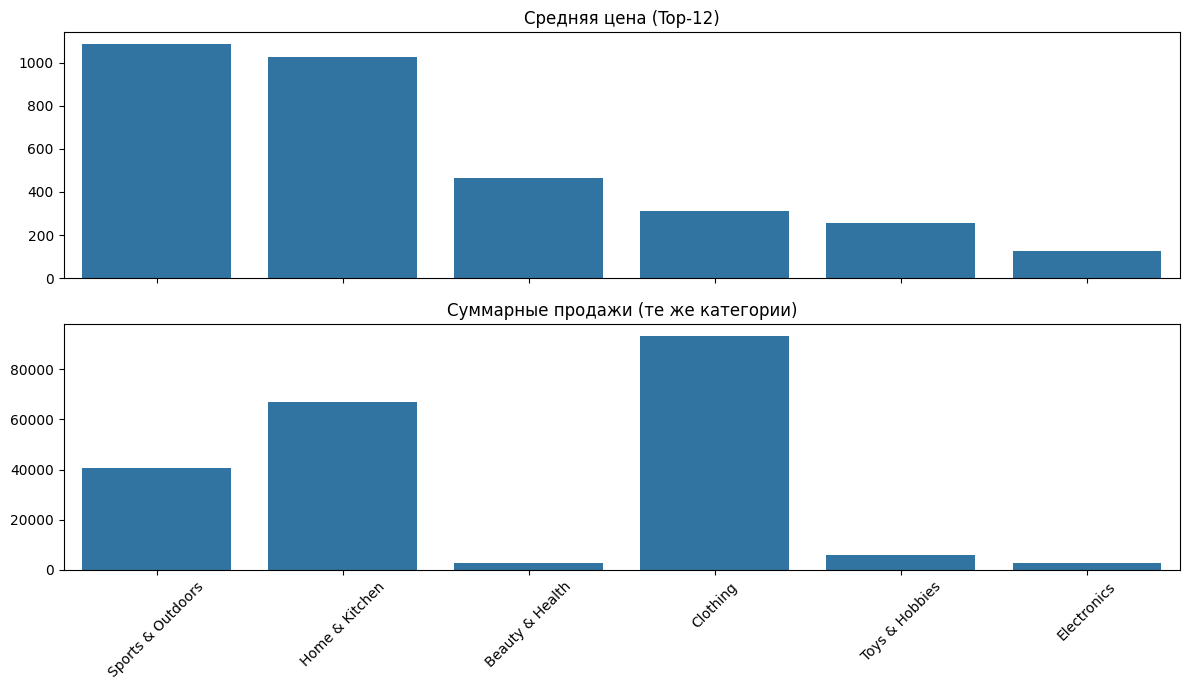

In [64]:
fig, axes = plt.subplots(2,1, figsize=(12,7), sharex=True)
avg = df.groupby(cat_col)[price_col].mean().sort_values(ascending=False).head(12)
sum_sales = df.groupby(cat_col)["sales_count"].sum().reindex(avg.index)

sns.barplot(x=avg.index, y=avg.values, ax=axes[0]); axes[0].set_title("Средняя цена (Top-12)")
sns.barplot(x=sum_sales.index, y=sum_sales.values, ax=axes[1]); axes[1].set_title("Суммарные продажи (те же категории)")
for ax in axes: ax.tick_params(axis="x", rotation=45); ax.set_xlabel(""); ax.set_ylabel("")
plt.tight_layout(); plt.show()

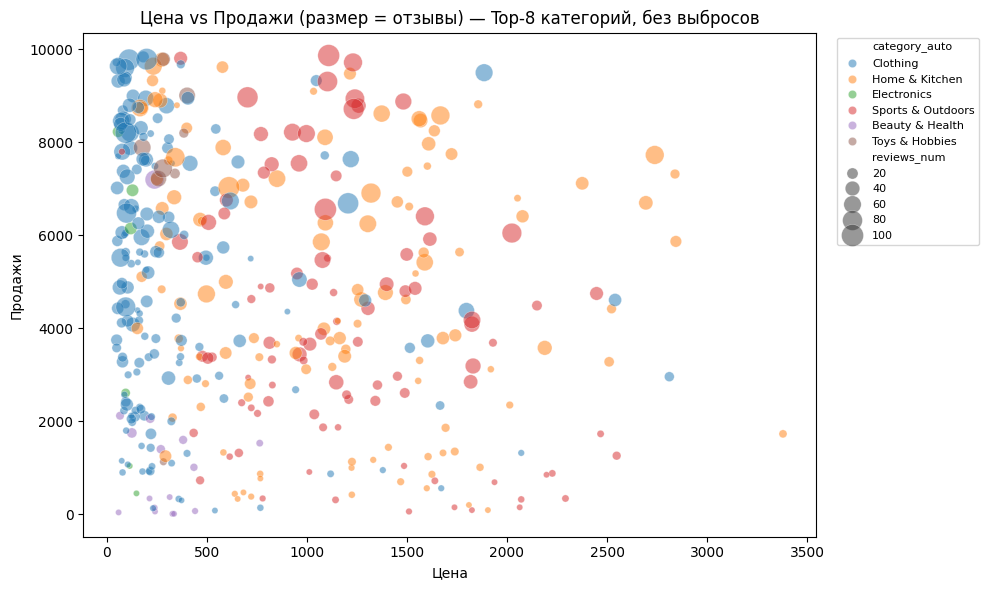

In [ ]:
def clean_intlike(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip()

    s = s.str.replace("\u00A0", "", regex=False).str.replace(" ", "", regex=False)

    s = s.str.replace(r"[^\d]", "", regex=True)
    return pd.to_numeric(s, errors="coerce")

df["reviews_num"] = clean_intlike(df["reviews"])
df["sales_count_num"] = clean_intlike(df["sales_count"])


top_cats = df[cat_col].value_counts().head(8).index
d = df[df[cat_col].isin(top_cats)].dropna(subset=[price_col, "sales_count_num", "reviews_num"]).copy()

q_price   = d[price_col].quantile(0.99)
q_sales   = d["sales_count_num"].quantile(0.99)
q_reviews = d["reviews_num"].quantile(0.99)

d = d[(d[price_col] <= q_price) &
      (d["sales_count_num"] <= q_sales) &
      (d["reviews_num"] <= q_reviews)]


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=d.sample(min(3000, len(d)), random_state=42), 
    x=price_col, y="sales_count_num",
    size="reviews_num", hue=cat_col,
    alpha=0.5, sizes=(20, 250), legend="brief"
)
plt.title("Цена vs Продажи (размер = отзывы) — Top-8 категорий, без выбросов")
plt.xlabel("Цена"); plt.ylabel("Продажи")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)
plt.tight_layout(); plt.show()

<h1>Описательная статистика</h>

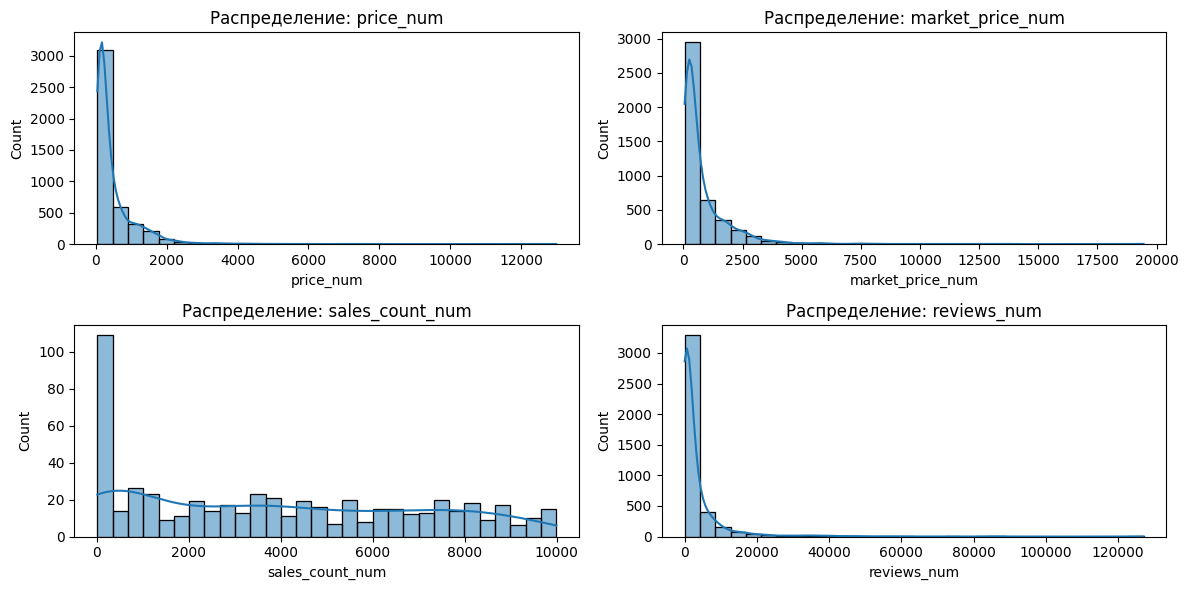

In [72]:
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Распределение: {col}")
plt.tight_layout()
plt.show()

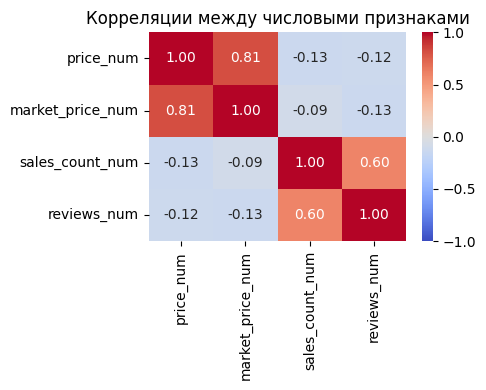

In [73]:
plt.figure(figsize=(5,4))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляции между числовыми признаками")
plt.tight_layout()
plt.show()

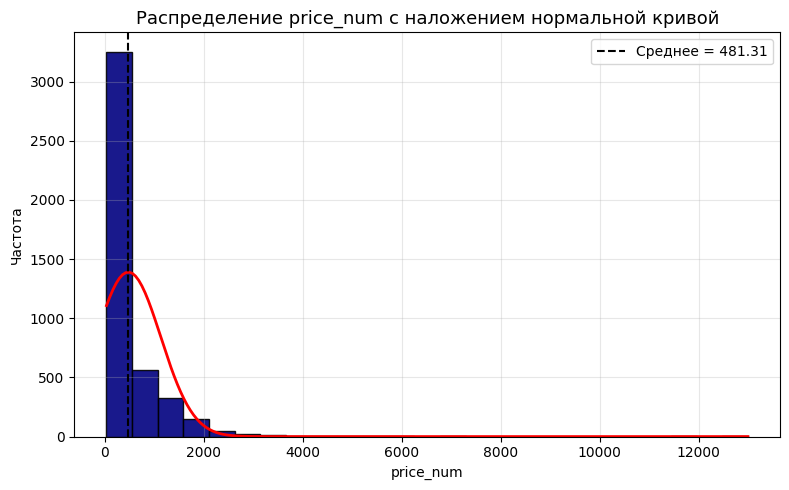

Среднее: 481.31
Медиана: 246.61
Стандартное отклонение: 654.25
Асимметрия: 5.19
Эксцесс: 60.69


In [83]:

col = 'price_num'

data = df[col].dropna()


mu, sigma = data.mean(), data.std()


plt.figure(figsize=(8,5))


count, bins, ignored = plt.hist(data, bins=25, color='navy', alpha=0.9, edgecolor='black')


x = np.linspace(min(bins), max(bins), 200)
plt.plot(x, norm.pdf(x, mu, sigma) * len(data) * (bins[1]-bins[0]), 'r', linewidth=2)


plt.axvline(mu, color='black', linestyle='--', linewidth=1.5, label=f'Среднее = {mu:.2f}')


plt.title(f'Распределение {col} с наложением нормальной кривой', fontsize=13)
plt.xlabel(col)
plt.ylabel('Частота')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Среднее: {mu:.2f}")
print(f"Медиана: {data.median():.2f}")
print(f"Стандартное отклонение: {sigma:.2f}")
print(f"Асимметрия: {data.skew():.2f}")
print(f"Эксцесс: {data.kurtosis():.2f}")



<h1>🧩 Гипотеза 1-Различие средней цены между двумя категориями</h1>

In [85]:
top2 = df['category_auto'].value_counts().index[:2]
cat1, cat2 = top2[0], top2[1]

x1 = df.loc[df['category_auto']==cat1, 'price_num'].dropna()
x2 = df.loc[df['category_auto']==cat2, 'price_num'].dropna()


p1 = stats.shapiro(x1.sample(min(5000, len(x1)), random_state=1))[1]
p2 = stats.shapiro(x2.sample(min(5000, len(x2)), random_state=1))[1]


if p1 > 0.05 and p2 > 0.05:
    test_name = "t-test (Welch)"
    stat, p = stats.ttest_ind(x1, x2, equal_var=False)
else:
    test_name = "Mann–Whitney U-test"
    stat, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')

print(f"Тест: {test_name}")
print(f"{cat1} mean={x1.mean():.2f}, {cat2} mean={x2.mean():.2f}, p-value={p:.4f}")

Тест: Mann–Whitney U-test
Clothing mean=310.43, Home & Kitchen mean=1023.93, p-value=0.0000


Средняя цена в категории Clothing ≈ 310

Средняя цена в категории Home & Kitchen ≈ 1024

p-value = 0.0000 → фактически меньше 0.001

🔹 Интерпретация

Нулевая гипотеза (H₀): распределения (и средние цены) одинаковые.

Альтернативная (H₁): распределения различаются.

Поскольку p-value < 0.05, мы отвергаем H₀.
✅ Значит, цены в категориях “Clothing” и “Home & Kitchen” статистически различаются.

<h1>Гипотеза 2 — Корреляция между отзывами и продажами</h1>

In [86]:
corr, p = stats.spearmanr(df['reviews_num'], df['sales_count_num'], nan_policy='omit')
print(f"Корреляция Спирмена = {corr:.3f}, p-value={p:.4f}")

Корреляция Спирмена = 0.665, p-value=0.0000


r = 0.665 → сильная положительная корреляция.
То есть чем больше отзывов, тем больше продаж.

p-value = 0.0000 (< 0.05) → связь статистически значима.
Случайное совпадение практически исключено.

<h1>Гипотеза 3 — Средняя цена различается между статусами</h1>

In [87]:
top_status = df['status'].value_counts().head(3).index
samples = [df.loc[df['status']==s, 'price_num'].dropna() for s in top_status]

f, p = stats.f_oneway(*samples)
print(f"ANOVA по статусам: F={f:.3f}, p-value={p:.4f}")

ANOVA по статусам: F=1.620, p-value=0.2032


F = 1.620 → это отношение межгрупповой дисперсии к внутригрупповой.
Чем выше F, тем больше различия между группами.
Но F сам по себе не используется для решения — смотри на p-value.

p-value = 0.2032 (> 0.05)
→ это значит, что вероятность случайно получить такие различия довольно высокая —
различия не считаются статистически значимыми.Гипотеза H₀ не отвергается.
→ Средние цены товаров не различаются между статусами
(например, “новинка”, “распродажа”, “хит продаж” имеют примерно одинаковый уровень цен).

<h1>Гипотеза 4 — Продажи отличаются по ценовым группам</h>

In [88]:
df['price_group'] = pd.qcut(df['price_num'], 3, labels=['дешевые','средние','дорогие'])
groups = [df.loc[df['price_group']==g, 'sales_count_num'].dropna() for g in df['price_group'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA по ценовым группам: F={f_stat:.3f}, p-value={p_val:.4f}")

ANOVA по ценовым группам: F=10.336, p-value=0.0000


Нулевая гипотеза отвергается.
→ Средние продажи существенно различаются между дешёвыми, средними и дорогими товарами.